# Interval Scheduling Algorithm With Applied Constraints (ISAAC)

##Overview

Upon acceptance into university, first year students are expected to create their own timetable based on the courses required for their program. For a typical student, this is an extremely overwhelming process, leading to confusion and frustration.  Many students eventually abandon the process, opting for a less-than-ideal schedule, rather than continue with the stressful task.

The origin of the stress is the huge number of options that a student faces.  The Fall 2015 Physics 1 course, for example, is comprised of 4 lecture sections, 28 tutorial sections and 42 laboratory sections.  Each student wishing to take this course must select one of each type of section.  There are 4704 combinations.

Of course, a student does not just take a single physics course, so the number of possible combinations becomes outrageously high very quickly.  Couple the sheer number of combinations with the fact that many are impossible because of timing conflicts and a week 1/week 2 scheduling pattern and it's easy to see why students concede quickly in the search for an optimal, or even decent schedule.


###Some numbers for motivation

A student must take one of each type of section (lab, lecture, tutorial, etc.) for each of $N$ courses in which they wish to enroll.  If $N$ courses each have $T$ distinct section types, and each type has $S$ unique sections, the total number of possible combinations is given by the double product

\begin{equation}
C = \prod\limits_{n}^{N}\prod\limits_{t}^{T_n} S_t .
\end{equation}



A first year science student must take Biology I, Chemistry I, Physics I, Intro to Computer Science and Calculus I.  Querying our database of courses to find the number of sections for each of these courses:

```SQL
select count(*),code,type from sectiondb where semester='201509' and code in ('PHY1010U','BIOL1010U','CHEM1010U','CSCI1030U','MATH1010U') GROUP BY code,type;
```



```
+----------+-----------+------+
| count(*) | code      | type |
+----------+-----------+------+
|       24 | BIOL1010U | Lab  |
|        3 | BIOL1010U | Lec  |
|       22 | CHEM1010U | Lab  |
|        3 | CHEM1010U | Lec  |
|       16 | CHEM1010U | Tut  |
|        3 | CSCI1030U | Lab  |
|        1 | CSCI1030U | Lec  |
|        4 | MATH1010U | Lec  |
|       28 | MATH1010U | Tut  |
|       42 | PHY1010U  | Lab  |
|        4 | PHY1010U  | Lec  |
|       28 | PHY1010U  | Tut  |
+----------+-----------+------+

```


we see that the number of possibilities for a real-life situation is:

\begin{equation}
C = (24 \times 3) \times (22\times 3\times 16) \times  (3\times 1) \times  (4\times 28) \times  (42\times 4\times 28) = 120171921408 .
\end{equation}

This is over **120 _billion_** possible timetables.  Of course, many of these are invalid and can be eliminated because they are comprised of sections with conflicting times, but timing is just another layer of complexity that the incoming freshman must consider.

The number of _valid_ timetables, taking into consideration time overlap, numbers at least 930000$^\dagger$.



$^\dagger$ We generated 10 million random schedules, which included 933209 unique, valid schedules, thus this is a lower limit of the number of possible schedules.

##Implementation

###How we validate schedules

When a user selects their desired courses, all sections for those courses are queried from the database and sent to the optimization algorithm.  The algorithm then counts the unique course-type combinations for the entered courses.
\begin{equation}
R = \sum\limits_{n}^{N}\sum\limits_{t}^{T_n} 1
\end{equation}
This is the number $R$ of required sections that must be present in a valid schedule.  For our example student above, $R=12$, the number of rows in the table above.

We then use our graph theory approach to find maximal independent sets.  The algorithm tries ```config.maximum_attempts_per_schedule``` times to generate a schedule that contains $R$ schedules.






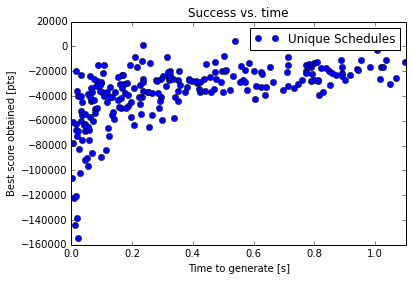

In [28]:
%matplotlib inline
import pylab
from matplotlib import pyplot as plt

list_of_files = [["../src/webserver/stats.txt", "Unique Schedules"]]

datalist = [ ( pylab.loadtxt(filename,skiprows=1), label ) for filename, label in list_of_files ]

for data, label in datalist:
    plt.plot(data[:,5], data[:,4], 'o', label=label )
    #pylab.plot( data[:,0], data[:,1], label=label )

    
#plt.ylim([0,1])
plt.xlim([0,1.1])
plt.legend()
plt.title("Success vs. time")
plt.xlabel("Time to generate [s]")
plt.ylabel("Best score obtained [pts]")
plt.show()
#pylab.show()


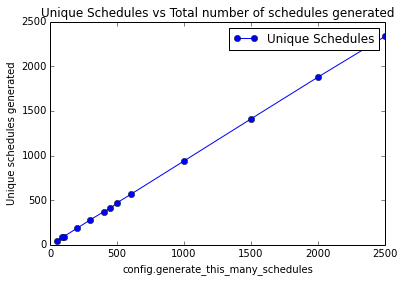

In [31]:
%matplotlib inline
import pylab
from matplotlib import pyplot as plt

list_of_files = [["data/unique_schedules.dat", "Unique Schedules"]]

datalist = [ ( pylab.loadtxt(filename), label ) for filename, label in list_of_files ]

for data, label in datalist:
    plt.plot(data[:,0] , data[:,1], 'o-', label=label )
    #pylab.plot( data[:,0], data[:,1], label=label )

    
    
plt.legend()
plt.title("Unique Schedules vs Total number of schedules generated")
plt.xlabel("config.generate_this_many_schedules")
plt.ylabel("Unique schedules generated")
plt.show()
#pylab.show()
